# Setup
Trying to import the different runs individually, starting with documentation from Timothee

## Importation of the libraries

In [15]:
import pandas as pd
import os
import re
from matplotlib import cm 
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import itertools
import src.compute_data_auto as cda

plt.style.use('../anemotaxis.mplstyle')

In [16]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Variables
Check what are the required variables

In [17]:
min_t,max_t,step_t = 5,600,5
min_to,max_to,step_to = 60,602,5 

In [18]:
#Path where the procressed data are stored
data_path = "/mnt/c/Users/schatterjee/Documents/anemotaxis/data/20210803_112230/"

## Test data

In [24]:
name_columns = ["time","speed","length","curvature"]

In [25]:
cda.chore_all(data_path)

 :  Already analysed 


In [26]:
cda.run_compute(path_data=data_path, name_columns=name_columns, save_folder=data_path)

 :  Already analysed 


IndexError: list index out of range

In [27]:
#Retrieve all the metadata from this folder

def meta_one_file(file):
    meta = file.split("@")
    genotype = meta[0]
    effector = meta[1]
    date = meta[2]
    date = re.sub(r'.json',"",date) 
    return genotype,effector,date

#To be able to see what we have in the folder

set_genotypes = set()
set_effectors = set()
set_dates = set()

list_files = os.listdir(data_path)

for file in list_files :
    ext = os.path.splitext(file)[1]
    if ext == ".json" :
        genotype,effector,date = meta_one_file(file)   
        set_genotypes.add(genotype)
        set_effectors.add(effector)
        date = re.sub(r'_[0-9]{6}',"",date)
        set_dates.add(date)
    else:
        print(file, " why not JSON ?")

20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00001.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00003.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00005.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00006.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00007.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00009.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00010.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00013.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00015.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00016.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5gradient2_2s1x600s0s#n#n#n@20.00017.dat  why not JSON ?
20210803_112230@CSMH@CSMH@t7@p_5

In [28]:
# Display the metadata
print("Genotypes : ",set_genotypes)
print("Effectors : ",set_effectors)
print("Dates  : ",set_dates)

Genotypes :  {'CSMH'}
Effectors :  {'CSMH'}
Dates  :  {'20210803'}


In [29]:
#Final dict with all the raw data
raw_data = dict()

#Setting the structure of the dictionnary
for genotype in set_genotypes:
    raw_data[genotype] = dict()

#Importing the data : 

for file in list_files : 
    if os.path.splitext(file)[1] == ".json":
        genotype,effector,date = meta_one_file(file)
        #if not "20240226" in date :
        path = data_path + "/" + file
        data_file = pd.read_json(path)
        raw_data[genotype][date] = data_file
    else : continue

In [30]:
print(raw_data['CSMH']['20210803_112230'].keys())

Index(['time', 'speed', 'length', 'curvature'], dtype='object')


# Useful functions

In [31]:
##split the data of the different larvae for 1 experiment
#Reminder : 1 experiment is saved as a dataframe of the concatenated dataframes for each larvae

def split_exp_to_larvae(data_exp):
    """Function that take for input the concatenated data of 1 experiment and output a dictionary which contains the data for each larva separetely 

    Args:
        data_exp (pd.Dataframe): Dataframe of the concatenated data

    Returns:
        dict: dictionnary of the separated larvae data. Each items if a dataframe of the data for 1 larvae
    """
    dict_exp = {} #Dictionnary that will contain all the different larvae (keys = id of the larvae)
    
    #To retriveve all the IDs of the larvae for this exp
    ID_larvae = set(data_exp["id"])
    #print(ID_larvae)
    
    for _id in ID_larvae:
        #print("ID : ",_id)
        data_larva = data_exp[data_exp["id"] == _id]
        dict_exp[_id] = data_larva
    
    return dict_exp

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

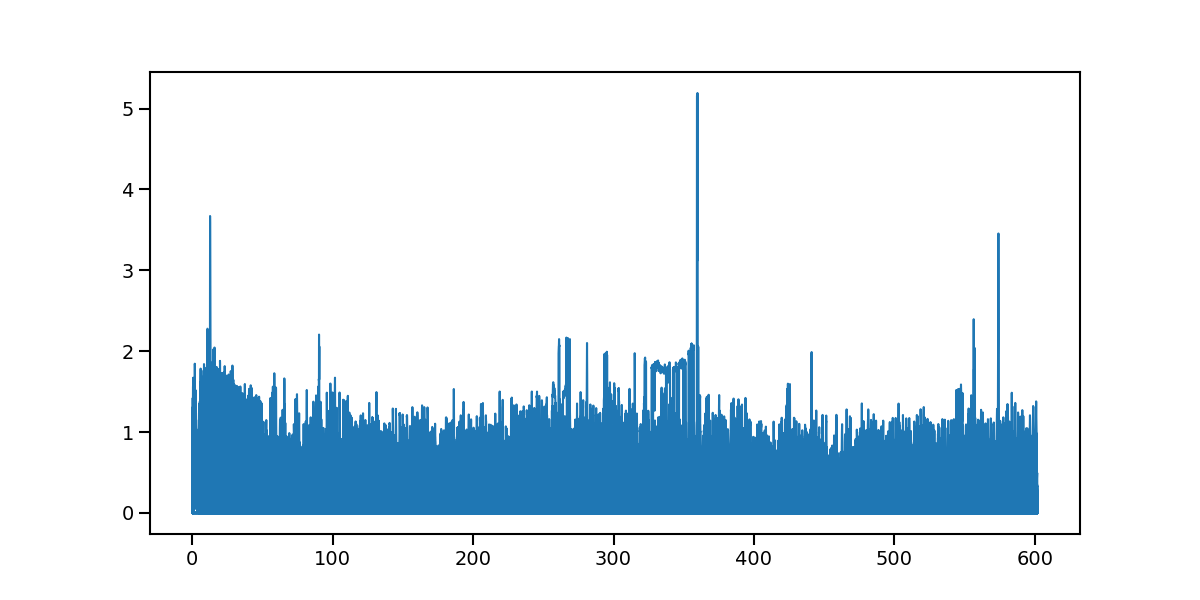

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [33]:
fig = plt.figure(figsize=(12,6))
plt.plot(raw_data['CSMH']['20210803_112230']['time'], raw_data['CSMH']['20210803_112230']['speed'])
plt.show()

In [14]:
from matplotlib import font_manager
print([f.name for f in font_manager.fontManager.ttflist if "Arial" in f.name])


[]


In [51]:
#Function to format the raw data to have independent data for each larvae

def split_larvae_all(raw_data):
    split_raw_data = dict()
    for genotype,dict_df in raw_data.items():
        dict_split_exp = dict()
        for date,df_exp in dict_df.items():
            dict_split = split_exp_to_larvae(df_exp)
            dict_split_exp[date] = dict_split
        split_raw_data[genotype] = dict_split_exp
    return split_raw_data


In [61]:
# split_raw_data = split_larvae_all(raw_data)

In [62]:

# print(split_raw_data["CSMH"].keys())
# print(split_raw_data["CSMH"]["20210803_112230"]

In [ ]:
raw_data['CSMH']['20210803_112230']['time']

dict_keys([2.125, 2.878, 5.5120000000000005, 5.119, 7.7379999999999995, 8.518, 8.850999999999999, 9.607, 11.003, 9.997, 13.741, 14.857, 14.271, 16.009, 17.039, 17.515, 19.107, 20.726, 20.976, 22.006, 23.101, 24.798000000000002, 25.03, 26.524, 18.217, 28.375, 29.798000000000002, 21.342, 31.006, 31.726, 32.452, 33.601, 35.048, 34.298, 35.851, 36.952, 37.202, 40.024, 41.027, 38.572, 43.038, 41.197, 45.048, 46.053, 44.875, 48.179, 49.039, 45.298, 51.024, 50.798, 53.042, 54.012, 55.018, 56.051, 51.476, 51.928, 59.044, 60.021, 61.044, 61.943, 63.032, 64.041, 65.043, 65.961, 67.356, 64.762, 68.53, 68.588, 62.167, 63.256, 64.1, 65.154, 66.018, 67.025, 68.142, 69.038, 70.042, 71.047, 72.059, 73.031, 74.007, 75.049, 76.042, 77.019, 78.0, 79.033, 80.015, 81.012, 82.021, 83.053, 84.034, 85.064, 86.015, 87.021, 88.054, 89.035, 90.039, 91.043, 94.032, 95.009, 96.066, 97.019, 98.022, 99.001, 100.035, 101.039, 102.016, 103.025, 104.005, 105.01, 106.016, 107.037, 108.05, 109.029, 110.034, 111.008, 113.

In [ ]:
# Navigationnal index from data of 1 larva 

def NI_ind(data_ind, ax="x"): 
    """Function that compute the navigationnal index (normalized or not) for 1 larva

    Args:
        data_ind (pd.Dataframe): data for 1 larvae
        ax (str, optional): Axis along which we compute the NI. Defaults to "x".
    
    Returns:
        dict : THe values of the normalized and not normalized navigationnal index
    """
    #Retrieve the interesting data 
    axis = "vel_x" if ax=="x" else "vel_y"
    vel_axis = data_ind[axis]
    speed = data_ind["speed"]
    midline = data_ind["midline"].mean() #Mean of the midline ? 
    
    #Normalize
    norm_vel = vel_axis / midline
    norm_speed = speed / midline
    
    #means
    mean_vel = vel_axis.mean()
    mean_vel_norm = norm_vel.mean()
    mean_speed = speed.mean()
    mean_speed_norm = norm_speed.mean()
    
    #NI 
    #NI = mean_vel/mean_speed
    NI = vel_axis/speed
    NI = NI.mean()
    NI_norm = NI/midline
    dict_NI = {"NI" : NI,"NI_norm": NI_norm}
    
    return dict_NI

In [ ]:
#To see the number of larvae for each experiments
for genotype,dict_genotype in split_raw_data.items():
    print("\n _________________ \n")
    print(genotype,": \n")
    total = 0
    for date,exp in dict_genotype.items():
        nb_larvae = len(exp)
        total +=nb_larvae
        print(date, " : ", nb_larvae)
    print("Total : ",total)

******

In [ ]:
dict_persistency = dict()
for genotype,dict_gen in split_raw_data.items():
    df_gen = pd.DataFrame()
    for exp,data_exp in dict_gen.items():
        for larva,df_larva in data_exp.items():
            persistency = df_larva["persitence"].max()
            persistency_larva = pd.DataFrame({"id" : larva,"date" : exp,"persistence" : persistency},index=[0])
            df_gen = pd.concat([df_gen,persistency_larva])
    dict_persistency[genotype] = df_gen
            

In [ ]:
dict_persistency

In [ ]:
fig, axes = plt.subplots(4,3,figsize = (20,20))
for ind,(genotype,data_persistency) in enumerate(dict_persistency.items()):
    row,col = divmod(ind,3)
    axes[row,col].set_title(genotype)
    data_persistency["persistence"].plot(kind="hist",ax=axes[row,col],bins = 30)

In [ ]:
for genotype,df in dict_persistency.items():
    print(genotype, ': ')
    nb_sup_300 = len(df[df["persistence"] > 500])
    total = len(df)
    perc = nb_sup_300 / total
    print("{} Larvae with tracks sup than 300 over {} so : {} %".format(nb_sup_300,total,perc))
    print("\n ___ ")

In [ ]:
lim_t = 305
for genotype,df in dict_persistency.items():
    print(genotype, ': ')
    dates = set(df["date"])
    for date in dates: 
        data_date = df[df["date"] == date]
        nb_sup_300 = len(data_date[data_date["persistence"] > lim_t])
        total = len(data_date)
        perc = nb_sup_300 / total
        print("{} larvae over {} so : {} %".format(nb_sup_300,total,perc))
    print("\n ___ ")

In [ ]:
DF_PERSISTENCY = pd.DataFrame()
for genotype,df_persistence in dict_persistency.items():
    ser_name = pd.Series([genotype for i in range(len(df_persistence))])
    df_persistence["genotype"]=ser_name
    #print(df_persistence)
    DF_PERSISTENCY = pd.concat([DF_PERSISTENCY,df_persistence])
DF_PERSISTENCY

In [ ]:
DF_PERSISTENCY["persistence"].plot(kind= "hist",bins=20)

In [ ]:
df_time = pd.DataFrame()
for genotype,dict_gen in split_raw_data.items(): 
    for exp,dict_exp in dict_gen.items():
        for id_larva, df_larva in dict_exp.items():
            NIx = NI_ind(df_larva,ax="x")["NI"]
            NIy = NI_ind(df_larva,ax="y")["NI"]
            end_time = df_larva["time"].max()
            start_time = df_larva["time"].min()
            comp_pers = end_time-start_time
            pers = df_larva["persitence"]
            mem = exp.split("_")
            date = mem[0]
            time = mem[1]
            line_larva = pd.DataFrame({"id" : [id_larva],
                                       "date" : [date],
                                       "time" : [time], 
                                       "genotype" : [genotype],
                                       "start_time": [start_time],
                                       "end_time" : [end_time],
                                       "comp_pers" : [comp_pers],
                                       "NIx" : [NIx],
                                       "NIy" : [NIy]
                                       })
            df_time = pd.concat([df_time,line_larva],ignore_index=True)

In [ ]:
df_time[~(df_time["genotype"]=="FCF_attP2-40")]["end_time"].plot(kind = 'hist',bins = 20)

Index that might be interesting to test : 
Let's have for larva $i \in \llbracket 1,n \rrbracket$, $s_i$ defined as : $$ S_i = \frac{T - s_i}{T}$$
with $T = \max( \{t_{i,j}\}_{i,j \in \llbracket 1,k \rrbracket \times \llbracket 1,n \rrbracket})$ the maximum value of time of tracked object, $s_i = \min ( \{t_j\}_{j \in \llbracket 1,k \rrbracket})$ the start time of the tracking of the object : 

and $p_i$ : $$ p_i = \frac{e_i - s_i}{T} $$
with $e_i = \max ( \{t_j\}_{j \in \llbracket 1,k \rrbracket})$


From here we can have : $$ P_i = p_i \times S_i $$ 
This could quantify how much we can trust the choosen framing to compute navigationnal index

In [ ]:
T = df_time["end_time"].max()
df_time

In [ ]:
df_time.loc[df_time["genotype"] == "GMR_MB054B"]

In [ ]:
df_time["s_i"] = (T - df_time["start_time"]) / T
df_time["p_i"] = df_time["comp_pers"] / T
df_time["P_i"] = df_time["s_i"] * df_time["p_i"]
df_time["P_i"].mean()

In [ ]:
test = df_time.groupby("genotype").mean("P_i")
test = test["P_i"] 
test
n_genotype = df_time.groupby("genotype").count()
n_genotype = n_genotype['id']
n_genotype.name = "n"
test.mean()

If we compute : $$ \theta =  \alpha \lang P_i \rang_{i \in \llbracket 1,n \rrbracket} \times \beta \nu $$ we can have a function that link the number of larvae and the fidelity. 
To find the optimal framing we just need to find the maximum of this function with with different value of min time of persistency, and time

$$ \nu = 1 - \frac{\max(n_{t,to}) - n_{t,to}}{\max(n_{t,to})} $$ 

In [ ]:
def compute_theta_and_n(df_time):
    N = len(df_time)
    T = df_time["end_time"].max()
    df_time["s_i"] = (T - df_time["start_time"]) / T
    df_time["p_i"] = df_time["comp_pers"] / T
    df_time["P_i"] = df_time["s_i"] * df_time["p_i"]
    theta_genotype = df_time.groupby("genotype").mean("P_i")
    theta_genotype = theta_genotype["P_i"]
    
    n_genotype = df_time.groupby("genotype").count()
    n_genotype = n_genotype['id']
    n_genotype.name = "n"
    #n_genotype = (N - n_genotype)/N
    
    return theta_genotype,n_genotype

In [ ]:

min_t,max_t,step_t = 5,600,5
min_to,max_to,step_to = 60,602,5 

arr_t = [str(t) for t in range(min_t,max_t,step_t)]
print(arr_t)
arr_to = [str(to) for to in range(min_to,max_to,step_to)]
print(arr_to)

DF_THETA = pd.DataFrame(columns = arr_t,index=arr_to)
DF_N = pd.DataFrame(columns = arr_t,index=arr_to)

for to in arr_to:
    iterator = itertools.filterfalse(lambda x: int(x) > int(to),arr_t)
    for t in iterator :
        df_time_truncated = df_time[df_time["comp_pers"] > int(t)]
        df_time_truncated = df_time_truncated[df_time_truncated["end_time"] > int(to)]
        theta_df,n_df = compute_theta_and_n(df_time_truncated)
        DF_THETA[t][to] = theta_df
        DF_N[t][to]= n_df


In [ ]:
N = len(df_time)
DF_THETA_MEAN = pd.DataFrame(columns = arr_t,index=arr_to)
DF_N_MEAN = pd.DataFrame(columns = arr_t,index=arr_to)

for t in arr_t : 
    ind_not_null = ~pd.isnull(DF_THETA[t])
    for to in DF_THETA.index:
        if ind_not_null[to]:
            theta_mean = DF_THETA[str(t)][str(to)].mean()
            n_mean = DF_N[str(t)][str(to)].sum()
            #print(theta_mean)
            DF_THETA_MEAN[str(t)][str(to)] = theta_mean
            DF_N_MEAN[str(t)][str(to)] = 1- (N - n_mean)/N


In [ ]:
arr_t_int = [t for t in range(min_t,max_t,step_t)]
arr_to_int = [to for to in range(min_to,max_to,step_to)]

X,Y = np.meshgrid(arr_t_int,arr_to_int)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, DF_N_MEAN, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [ ]:
DF_THETA_MEAN.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_THETA_MEAN.json")
DF_N_MEAN.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_N_MEAN.json")

In [ ]:
def master_to_df_NI_per_genotype(df_time,ax="x"):
    axis = "NIx" if ax == "x" else "NIy"
    dict_NI_per_gen  = dict()
    genotypes = set(df_time["genotype"])
    #print(genotypes)
    for genotype in genotypes :
        DF_genotype = df_time[[axis,"id"]][df_time["genotype"] == genotype]
        DF_genotype = DF_genotype.reset_index(drop=True)
        dict_NI_per_gen[genotype] = DF_genotype
    
    DF_NI_per_gen = pd.DataFrame()
    for genotype,df_gen in dict_NI_per_gen.items():
        col_to_add = df_gen[axis]
        col_to_add.name = genotype
        DF_NI_per_gen= pd.concat([DF_NI_per_gen,col_to_add],axis=1)
    return DF_NI_per_gen

In [ ]:
arr_t = [str(t) for t in range(min_t,max_t,step_t)]
#print(arr_t)
arr_to = [str(to) for to in range(min_to,max_to,step_to)]
#print(arr_to)

DF_NIx = pd.DataFrame(columns = arr_t,index=arr_to)
DF_NIy = pd.DataFrame(columns = arr_t,index=arr_to)

for to in arr_to:
    iterator = itertools.filterfalse(lambda x: int(x) > int(to),arr_t)
    for t in iterator :
        df_time_truncated = df_time[df_time["comp_pers"] > int(t)]
        df_time_truncated = df_time_truncated[df_time_truncated["end_time"] > int(to)]
        NIx_genotype = master_to_df_NI_per_genotype(df_time_truncated,ax = "x")
        NIy_genotype = master_to_df_NI_per_genotype(df_time_truncated,ax = "y")
        
        DF_NIx[t][to] = NIx_genotype
        DF_NIy[t][to]= NIy_genotype

In [ ]:
def Kruskal_over_DF(DF_list_NI_per_gen):
    to_test = tuple(np.array(DF_list_NI_per_gen[name]) for name in DF_list_NI_per_gen.columns)
    result = stats.kruskal(*to_test,nan_policy='omit')
    return(result.pvalue)

In [ ]:

def apply_NI(DF_TO_WORK,func,arr_t,arr_to,**kwarg):
    DF_OUTPUT = pd.DataFrame(columns = arr_t,index=arr_to)
    for t in arr_t : 
        ind_not_null = ~pd.isnull(DF_TO_WORK[t])
        for to in DF_TO_WORK.index:
            if ind_not_null[to]:
                df_per_gen = DF_TO_WORK[str(t)][str(to)]
                compressed_df = func(df_per_gen,**kwarg)
                DF_OUTPUT[str(t)][str(to)] = compressed_df
    return DF_OUTPUT

In [ ]:
DF_KRUSKAL = apply_NI(DF_NIx,Kruskal_over_DF,arr_t,arr_to)

In [ ]:
DF_KRUSKAL

In [ ]:
DF_KRUSKAL.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_KRUSKAL.json")

In [ ]:
def truncater_df(df_time,gen_to_keep,date_to_keep):
    genotypes = set(df_time["genotype"])
    dates = set(df_time["date"])
    gen_to_remove = [gen for gen in genotypes if gen not in gen_to_keep]
    #print("gen to remove  : {}".format(gen_to_remove))
    date_to_remove = [date for date in dates if date not in date_to_keep]
    #print("date to remove  : {}".format(date_to_remove))
    df_time_trunc = df_time
    for date in date_to_remove :
        df_time_trunc = df_time_trunc[~(df_time_trunc["date"] == date)]
    for gen in gen_to_remove : 
        df_time_trunc = df_time_trunc[~(df_time_trunc["genotype"] == gen)]
    return df_time_trunc

In [ ]:
def DF_NI_condition(df_time,date_to_select,genotype_to_select,arr_to,arr_t,axis):
    arr_t = [str(t) for t in range(min_t,max_t,step_t)]
    arr_to = [str(to) for to in range(min_to,max_to,step_to)]

    DF_OUTPUT = pd.DataFrame(columns = arr_t,index=arr_to)

    for to in arr_to:
        iterator = itertools.filterfalse(lambda x: int(x) > int(to),arr_t)
        for t in iterator :
            
            df_time_truncated = truncater_df(df_time,date_to_keep=date_to_select,gen_to_keep=genotype_to_select)
            df_time_truncated = df_time_truncated.loc[(df_time_truncated["comp_pers"] > int(t)) & (df_time_truncated["end_time"] > int(to))]
            #df_time_truncated = df_time_truncated[df_time_truncated["end_time"] > int(to)]
            
            NI_genotype = master_to_df_NI_per_genotype(df_time_truncated,ax = axis)
            
            DF_OUTPUT[t][to] = NI_genotype
    return(DF_OUTPUT)

In [ ]:
set(df_time["date"])

In [ ]:
gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

date_to_keep = ['20240219',
        '20240223',
        #'20240226',
        '20240301',
        '20240304',
        '20240308']

DF_NIx_wout_0226 = DF_NI_condition(df_time,date_to_keep,gen_to_keep,arr_to,arr_t,"x")

In [ ]:
DF_KRUSKAL_NIx_wout_0226 = apply_NI(DF_NIx_wout_0226,Kruskal_over_DF,arr_t,arr_to)
DF_KRUSKAL_NIx_wout_0226

In [ ]:
DF_KRUSKAL_NIy = apply_NI(DF_NIy,Kruskal_over_DF,arr_t,arr_to)

In [ ]:
#DF_KRUSKAL_NIy.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_KRUSKAL_NIy.json")
#DF_KRUSKAL_NIy_wout_0226.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_KRUSKAL_NIx_wout0226.json")

In [ ]:
gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

date_to_keep = ['20240219',
        '20240223',
        #'20240226',
        '20240301',
        '20240304',
        '20240308']

DF_NIy_wout_0226 = DF_NI_condition(df_time,date_to_keep,gen_to_keep,arr_to,arr_t,"y")
DF_KRUSKAL_NIy_wout_0226 = apply_NI(DF_NIy_wout_0226,Kruskal_over_DF,arr_t,arr_to)
DF_KRUSKAL_NIy_wout_0226.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_KRUSKAL_NIy_wout0226.json")

In [ ]:
gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

date_to_keep_list = ['20240219',
        '20240223',
        '20240226',
        '20240301',
        '20240304',
        '20240308']

for date in date_to_keep_list:
    date_to_keep = [date]
    DF_NIx = DF_NI_condition(df_time,date_to_keep,gen_to_keep,arr_to,arr_t,"y")
    DF_KRUSKAL_NIx = apply_NI(DF_NIx,Kruskal_over_DF,arr_t,arr_to)
    DF_KRUSKAL_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_KRUSKAL_NIy_{}.json".format(date))

In [ ]:
def mannwhitney_over_df(DF_time_list_NIx,gen1,gen2):
    data_gen1 = DF_time_list_NIx[gen1]
    data_gen2 = DF_time_list_NIx[gen2]
    pval = stats.mannwhitneyu(x= data_gen1,y=data_gen2,nan_policy="omit").pvalue
    return(pval)

In [ ]:
arr_t = [str(t) for t in range(min_t,max_t,step_t)]
#print(arr_t)
arr_to = [str(to) for to in range(min_to,max_to,step_to)]
#print(arr_to)

gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

gen_to_test = [#'FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 #'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 #'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948'
 #'GMR_SS02160'
 ]

date_to_keep = ['20240219',
        '20240223',
        #'20240226',
        '20240301',
        '20240304',
        '20240308']

DF_NIx = DF_NI_condition(df_time,date_to_select=date_to_keep,genotype_to_select=gen_to_keep,arr_to=arr_to,arr_t = arr_t,axis= "x")
for gen in gen_to_test:
    DF_compressed_NIx = apply_NI(DF_NIx,mannwhitney_over_df,arr_t,arr_to,gen1 = "FCF_attP2-40",gen2 = gen)
    DF_compressed_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_MannWith_NIx_w_control_{}.json".format(gen))

In [ ]:
def shapiro_over_df(df_NIx_concat,gen):
    arr_gen = df_NIx_concat[gen]
    result = stats.shapiro(arr_gen)
    return(result.pvalue)

In [ ]:
gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

for gen in gen_to_keep:
    DF_compressed_NIx = apply_NI(DF_NIx,shapiro_over_df,arr_t,arr_to,gen = gen)
    DF_compressed_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_Shapiro_{}.json".format(gen))

*** 

# Analysis for the presentation

In [ ]:
def compute_mean_one_gen_df(df_time_trunc, gen):
    arr_gen = df_time_trunc[gen]
    mean = arr_gen.mean()
    return mean

In [ ]:
def compute_sem_one_gen_df(df_time_trunc, gen):
    arr_gen = df_time_trunc[gen]
    mean = arr_gen.sem()
    return mean

In [ ]:
def diff_mean_genotypes(df_time_trunc, gen1, gen2):
    arr_gen1 = df_time_trunc[gen1] #usually control 
    arr_gen2 = df_time_trunc[gen2]
    mean_gen1 = arr_gen1.mean()
    mean_gen2 = arr_gen2.mean()
    diff = mean_gen1 - mean_gen2 
    return diff

In [ ]:
arr_t = [str(t) for t in range(min_t,max_t,step_t)]
#print(arr_t)
arr_to = [str(to) for to in range(min_to,max_to,step_to)]
#print(arr_to)

gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

date_to_keep = ['20240219',
        '20240223',
        #'20240226',
        '20240301',
        '20240304',
        '20240308']

DF_NIx = DF_NI_condition(df_time,date_to_select=date_to_keep,genotype_to_select=gen_to_keep,arr_to=arr_to,arr_t = arr_t,axis= "x")

In [ ]:
#Compute the mean

gen_to_test = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160'
 ]

for genotype in gen_to_test:
    DF_compressed_NIx = apply_NI(DF_NIx,compute_sem_one_gen_df,arr_t,arr_to,gen = genotype)
    DF_compressed_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_sem_NIx_wout2602_{}.json".format(genotype))

In [ ]:
#Compute the mean

gen_to_test = [#'FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160'
 ]

for genotype in gen_to_test:
    DF_compressed_NIx = apply_NI(DF_NIx,diff_mean_genotypes,arr_t,arr_to,gen1 = "FCF_attP2-40",gen2= genotype)
    DF_compressed_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_diff_NIx_wout2602_{}.json".format(genotype))

In [ ]:
def mean_by_date_one_gen(df_time_trunc,gen):
    arr_gen = df_time_trunc[gen]
    mean_arr = arr_gen.mean()
    return mean_arr

In [ ]:
arr_t = [str(t) for t in range(min_t,max_t,step_t)]
#print(arr_t)
arr_to = [str(to) for to in range(min_to,max_to,step_to)]
#print(arr_to)

gen_to_keep = ['FCF_attP2-40',
 'GMR_MB054B',
 'GMR_MB065B',
 'GMR_MB143B',
 'GMR_MB145B',
 'GMR_SS00864',
 'GMR_SS01696',
 'GMR_SS01716',
 'GMR_SS01757',
 'GMR_SS01948',
 'GMR_SS02160']

date_to_keep_list = ['20240219',
        '20240223',
        '20240226',
        '20240301',
        '20240304',
        '20240308']

for date in date_to_keep_list:
    date_to_keep = [date]
    DF_NIx = DF_NI_condition(df_time,date_to_keep,gen_to_keep,arr_to,arr_t,"x")
    DF_KRUSKAL_NIx = apply_NI(DF_NIx,mean_by_date_one_gen,arr_t,arr_to,gen="FCF_attP2-40")
    DF_KRUSKAL_NIx.to_json("/Users/timotheesanchez/Desktop/Behavior_analysis/data/DF_MEAN_FCF_by_DATE_{}.json".format(date))